<a href="https://colab.research.google.com/github/vikaschaudhary53/Book-Recommendation-System/blob/main/Book_Recommendation_System_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
books_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Books.csv')
ratings_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Ratings.csv')
users_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Users.csv')

In [ ]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books_df.shape

(271360, 8)

####Get the required columns in 'book_df'

In [ ]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
#select the columns that we need
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
#Rename columns
books_df.rename(columns={'Book-Title':'title', 'Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'}, inplace=True)

In [ ]:
books_df.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
books_df.isna().sum()

ISBN         0
title        0
author       1
year         0
publisher    2
dtype: int64

In [ ]:
#drop the null values from dataframe
books_df.dropna(inplace = True)

In [ ]:
books_df.isna().sum()

ISBN         0
title        0
author       0
year         0
publisher    0
dtype: int64

In [ ]:
books_df.isnull().sum()

ISBN         0
title        0
author       0
year         0
publisher    0
dtype: int64

###Know about the users

In [ ]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
users_df.shape

(278858, 3)

In [ ]:
#renaming all the columns to small case
users_df.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'}, inplace=True)

In [ ]:
users_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_df

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


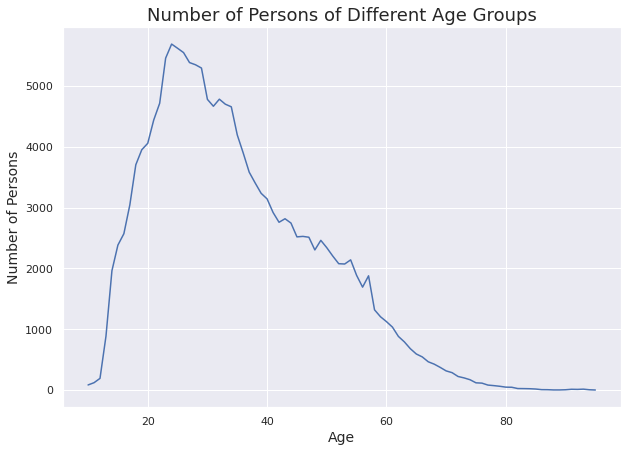

In [ ]:
#graph to show the number of ratings done by the different age group
plt.subplots(figsize =(10, 7))
users_df[(~users_df['age'].isnull()) & (users_df['age']>=10) & (users_df['age']<=95)]['age'].value_counts().sort_index().plot()
plt.xlabel('Age', size=14)
plt.ylabel('Number of Persons', size=14)
plt.title('Number of Persons of Different Age Groups', size=18)
plt.show()

In the 'age' column the values are going beyond the permissible limits. Users with the age beyond 15 years and below 90 will be kept.

In [ ]:
location_list = list(users_df['location'].value_counts().keys())
location_list

['london, england, united kingdom',
 'toronto, ontario, canada',
 'sydney, new south wales, australia',
 'melbourne, victoria, australia',
 'portland, oregon, usa',
 'chicago, illinois, usa',
 'seattle, washington, usa',
 'new york, new york, usa',
 'madrid, madrid, spain',
 'vancouver, british columbia, canada',
 'san diego, california, usa',
 'san francisco, california, usa',
 'ottawa, ontario, canada',
 'houston, texas, usa',
 'berlin, berlin, germany',
 'milano, lombardia, italy',
 'los angeles, california, usa',
 'austin, texas, usa',
 'calgary, alberta, canada',
 'barcelona, barcelona, spain',
 'hamburg, hamburg, germany',
 'roma, lazio, italy',
 'barcelona, catalunya, spain',
 'victoria, british columbia, canada',
 'brisbane, queensland, australia',
 'edmonton, alberta, canada',
 'st. louis, missouri, usa',
 'perth, western australia, australia',
 'tucson, arizona, usa',
 'philadelphia, pennsylvania, usa',
 'adelaide, south australia, australia',
 'montreal, quebec, canada',
 'a

In [ ]:
long_list = []
count = 0
for i in location_list:
  if len(i.split(",")) >3:
    count+=1
    long_list.append(i)
#print(count)


In [ ]:
long_list

['washington, dc, dc, usa',
 'amora, estremadura,, portugal',
 'washington, d.c., dc, usa',
 'vancouver, bc, british columbia, canada',
 'albuquerque,, new mexico, usa',
 'portland,, oregon, usa',
 'phoenix,, arizona, usa',
 'victoria, b.c., british columbia, canada',
 'v. n. santo andré, setúbal, alentejo, portugal',
 'christchurch, canterbury, south island, new zealand',
 'madrid, españa, madrid, spain',
 'prince george, bc, british columbia, canada',
 'richmond, va, virginia, usa',
 'woking, surrey, england, united kingdom',
 'brooklyn, ny, new york, usa',
 'austin, texas, texas, usa',
 'apple valley, mn, minnesota, usa',
 'beijing, beijing, china, china',
 'melbourne,, victoria, australia',
 'shanghai, shanghai,china, china',
 'toronto,, ontario, canada',
 'chicago, il, illinois, usa',
 'weybridge, surrey, england, united kingdom',
 'zürich, zürich, stadt, switzerland',
 'des moines, ia, iowa, usa',
 'st. peters,, missouri, usa',
 'ipswich, suffolk, england, united kingdom',
 'akro

Let's find out the country of users and plot a graph for the number of users per country

In [ ]:
country_list = [i.split(', ')[-1] for i in location_list]

In [ ]:
country_count = pd.DataFrame(([[x,country_list.count(x)] for x in set(country_list)]), columns=['country', 'no_of_ratings'])

In [ ]:
#top 10 countries 
country_count.sort_values(by=['no_of_ratings'], ascending=False)[:10]

,country,no_of_ratings
703,usa,18587
799,united kingdom,4064
470,germany,3979
623,spain,3060
425,italy,2642
508,canada,2492
1,australia,2472
832,",",1508
841,france,1441
611,netherlands,1006


In [ ]:
#removing the ',' entry in 'country' column and printing top 10 countries with the highest ratings
country_count = country_count[country_count['country']!=","]

In [ ]:
country_count.sort_values(by=['no_of_ratings'], ascending=False, inplace=True)

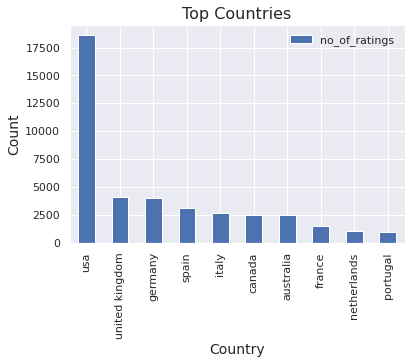

In [ ]:
#bar graph for top 10 countries with highest ratings

country_count[:10].plot(x="country", y="no_of_ratings", kind="bar")
plt.title('Top Countries', size=16)
plt.xlabel('Country', size=14)
plt.ylabel('Count', size=14)
plt.show()

###Know about ratings dataframe

In [ ]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
ratings_df.shape

(1149780, 3)

In [ ]:
#Rename the columns
ratings_df.rename(columns={'User-ID':'user_id','Book-Rating':'rating'}, inplace=True)

In [ ]:
ratings_df.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


####Filtering on the basis of:
1. Book at least has the ratings by 50 readers.
2. Reader at least has rated 200 books.

In [ ]:
ratings_df['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [ ]:
ratings_df[ratings_df['user_id']==11676]

,user_id,ISBN,rating
45326,11676,9022906116,7
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
45329,11676,0 7336 1053 6,0
45330,11676,0=965044153,7
...,...,...,...
58923,11676,O77O428452,0
58924,11676,O805063196,0
58925,11676,O9088446X,8
58926,11676,X000000000,10


In [ ]:
#top 10 users who rated the books
ratings_df['user_id'].value_counts()[:10]

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: user_id, dtype: int64

In [ ]:
#top 10 highest rated books
ratings_df['ISBN'].value_counts()[:10]

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
Name: ISBN, dtype: int64

In [ ]:
ratings_df['user_id'].value_counts().shape

(105283,)

In [ ]:
#keeping users with at least rating more than 200
ratings_df['user_id'].value_counts()>200

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: user_id, Length: 105283, dtype: bool

In [ ]:
x=ratings_df['user_id'].value_counts()>200

In [ ]:
x[x].shape

(899,)

In [ ]:
y=x[x].index

In [ ]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [ ]:
ratings_df=ratings_df[ratings_df['user_id'].isin(y)]

In [ ]:
ratings_df

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


###Joining 'ratings_df' with 'books_df'

In [ ]:
books_rating = ratings_df.merge(books_df, on='ISBN')

In [ ]:
books_rating

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann


In [ ]:
number_rating=books_rating.groupby('title')['rating'].count().reset_index()

In [ ]:
number_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [ ]:
number_rating.rename(columns={'rating':'number_of_ratings'}, inplace=True)

In [ ]:
number_rating

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [ ]:
#joining the rating with title
final_rating = books_rating.merge(number_rating, on='title')

In [ ]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,1
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),1
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",1
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,1


In [ ]:
final_rating = final_rating[final_rating['number_of_ratings']>50]

In [ ]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [ ]:
final_rating.isna().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [ ]:
final_rating.isnull().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [ ]:
final_rating.describe()

,user_id,rating,number_of_ratings
count,59903.000000,59903.000000,59903.000000
mean,140727.330985,2.012620,102.562326
std,80777.459046,3.570031,51.926142
min,254.000000,0.000000,51.000000
25%,70052.000000,0.000000,65.000000
50%,140358.000000,0.000000,84.000000
75%,212923.000000,3.000000,123.000000
max,278418.000000,10.000000,363.000000


In [ ]:
booksWithNoYear = list(final_rating[final_rating['year'] == 0]['title'].value_counts().keys())

In [ ]:
len(booksWithNoYear)

29

In [ ]:
final_rating['year'].value_counts(ascending = False)[:50]

2002    7125
1999    5984
2001    5221
2000    4497
1998    4326
2003    4255
1996    3969
1997    3671
1994    3042
1995    2849
1993    2375
1992    2190
2004    1400
1990    1385
1989    1237
1991    1100
1986    1037
1987     917
1988     756
1984     477
1983     389
1985     314
1982     265
0        193
1976     151
1978     143
1959     116
1981      76
1979      68
1974      68
1980      43
1968      28
1975      22
2001      20
1999      18
2000      17
1993      12
2002      11
1995       9
2003       8
1998       8
1977       7
1992       7
1996       7
1994       6
1961       6
1960       6
1962       6
1997       5
0          5
Name: year, dtype: int64

0 is appearing twice, so it must be due to the datatype

In [ ]:
#validatae if there are any unusual values in 'year' column
final_rating['year'] = final_rating['year'].astype(int)
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [ ]:
final_rating['year'].value_counts(ascending = False)[:50]

2002    7136
1999    6002
2001    5241
2000    4514
1998    4334
2003    4263
1996    3976
1997    3676
1994    3048
1995    2858
1993    2387
1992    2197
2004    1401
1990    1387
1989    1240
1991    1105
1986    1038
1987     918
1988     759
1984     478
1983     391
1985     315
1982     267
0        198
1976     151
1978     143
1959     117
1981      77
1979      69
1974      68
1980      48
1968      28
1975      23
1977      10
1962       6
1960       6
1961       6
1943       4
1971       4
1956       4
1948       3
1920       2
1951       2
1973       1
1969       1
2010       1
Name: year, dtype: int64

In [ ]:
#dropping row where year is 0
final_rating = final_rating[final_rating['year'] != 0]
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [ ]:
#check if 0 is still present in the dataframe
final_rating[final_rating['year']>1]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


In [ ]:
final_rating['year'].value_counts().sort_index()

1920       2
1943       4
1948       3
1951       2
1956       4
1959     117
1960       6
1961       6
1962       6
1968      28
1969       1
1971       4
1973       1
1974      68
1975      23
1976     151
1977      10
1978     143
1979      69
1980      48
1981      77
1982     267
1983     391
1984     478
1985     315
1986    1038
1987     918
1988     759
1989    1240
1990    1387
1991    1105
1992    2197
1993    2387
1994    3048
1995    2858
1996    3976
1997    3676
1998    4334
1999    6002
2000    4514
2001    5241
2002    7136
2003    4263
2004    1401
2010       1
Name: year, dtype: int64

In [ ]:
#basic overview
print("Number of Books in final dataset:", len(final_rating.groupby(['title']).count()))
print("Number of Author in final dataset:", len(final_rating.groupby(['author']).count()))
print("Number of Publishers in final dataset:", len(final_rating.groupby(['publisher']).count()))


Number of Books in final dataset: 703
Number of Author in final dataset: 563
Number of Publishers in final dataset: 350


In [ ]:
#number of authors mentions
final_rating['author'].value_counts()

Stephen King          2509
Nora Roberts          2200
John Grisham          1820
James Patterson       1751
Mary Higgins Clark    1309
                      ... 
Jim Debrosse             1
Terry Coleman            1
Patrick O'Leary          1
Jefferson Carter         1
Madeena S. Nolan         1
Name: author, Length: 563, dtype: int64

In [ ]:
#converting all the authors name into the lowercase
final_rating['author'] = final_rating['author'].str.lower()
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,127233,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228881,262399,0061090956,0,Still Waters,kerry tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,178667,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83
228883,185233,074350996X,0,Still Waters,jennifer lauck,2001,Simon &amp; Schuster Audio,83


In [ ]:
final_rating[final_rating['title'] == "When the Wind Blows"]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
15869,277478,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15870,2276,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15871,11676,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
15872,16795,0446607657,9,When the Wind Blows,james patterson,1999,Warner Vision,175
15873,23768,0446607657,0,When the Wind Blows,james patterson,1999,Warner Vision,175
...,...,...,...,...,...,...,...,...
16039,56399,0140094199,10,When the Wind Blows,raymond briggs,1982,Penguin USA,175
16040,122881,0140094199,0,When the Wind Blows,raymond briggs,1982,Penguin USA,175
16041,88283,0446676438,0,When the Wind Blows,james patterson,2000,Warner Books,175
16042,125519,0446676438,9,When the Wind Blows,james patterson,2000,Warner Books,175


In [ ]:
final_rating[final_rating['title']=="When the Wind Blows"]['author'].value_counts()

james patterson     134
john saul            15
zachary alan fox      7
judith marshall       3
raymond briggs        2
Name: author, dtype: int64

* The books with same title has different authors.
* But the ISBN number is different.

In [ ]:
final_rating['ISBN'].value_counts()

0971880107    363
0316666343    270
0060928336    220
0440214041    218
0385504209    215
             ... 
0743467256      1
0345371291      1
8401422345      1
3257208626      1
0613224450      1
Name: ISBN, Length: 2106, dtype: int64

In [ ]:
final_rating[final_rating['ISBN']=='0316666343']['author'].value_counts()

alice sebold    270
Name: author, dtype: int64

Validate if unique ISBN have unique author name.

In [ ]:
final_rating.groupby('ISBN')['author'].count().sort_values()

ISBN
0001047973      1
0553474286      1
055347703X      1
055347765X      1
0553477706      1
             ... 
0385504209    215
0440214041    218
0060928336    220
0316666343    270
0971880107    363
Name: author, Length: 2106, dtype: int64

Explore about the authors and books

In [ ]:
final_rating[final_rating['ISBN']=='0971880107']['author'].value_counts()

rich shapero    363
Name: author, dtype: int64

In [ ]:
isbn_author = final_rating[['ISBN', 'author']]
isbn_author

,ISBN,author
0,002542730X,james finn garner
1,002542730X,james finn garner
2,002542730X,james finn garner
3,002542730X,james finn garner
4,002542730X,james finn garner
...,...,...
228880,0061090956,kerry tucker
228881,0061090956,kerry tucker
228882,074350996X,jennifer lauck
228883,074350996X,jennifer lauck


In [ ]:
print("Unique ISBN:", len(isbn_author['ISBN'].value_counts()))
print("Unique authors:",len(isbn_author['author'].value_counts()))

Unique ISBN: 2106
Unique authors: 495


In [ ]:
isbn = final_rating.groupby('ISBN')

In [ ]:
book_count_list = list(isbn.first()['title'].value_counts().values)

In [ ]:
len(book_count_list)

703

In [ ]:
book_list = list(isbn.first()['title'].value_counts().keys())

In [ ]:
book_names = []
j = 0
for i in book_count_list:
  if i>1:
    book_names.append(book_list[j])
    j += 1

In [ ]:
len(book_names)

526

In [ ]:
book_names[:10]

['Wuthering Heights',
 'The Secret Garden',
 'Pride and Prejudice',
 'The Wedding',
 'The Gift',
 'Homecoming',
 'The Promise',
 'Fahrenheit 451',
 'Carrie',
 'Matilda']

Get a list of books where the authors entries are different or more than one.

In [ ]:
#creating a list of books with 2 authors entries
two_authors_book = []
many_authors_books = []
count = 0
for i in book_names:
  if len(final_rating[final_rating['title']== i]['author'].value_counts().values)==2:
    two_authors_book.append(book_names[count])
  
  elif len(final_rating[final_rating['title']== i]['author'].value_counts().values) >2:
    many_authors_books.append(book_names[count])
  count +=1


In [ ]:
print("There are", len(two_authors_book),"books where the number of entries in 'author' column are 2")
print("There are", len(many_authors_books),"books where the number of entries in 'author' column are more than 2")

There are 72 books where the number of entries in 'author' column are 2
There are 61 books where the number of entries in 'author' column are more than 2


In [ ]:
author1 = []
author2 = []
for i in two_authors_book:
  author1.append(final_rating[final_rating['title']==i]['author'].value_counts().keys()[0])
  author2.append(final_rating[final_rating['title']==i]['author'].value_counts().keys()[1])


In [ ]:
author1[:5]

['ray bradbury',
 'j.r.r. tolkien',
 'j.r.r. tolkien',
 'j.r.r. tolkien',
 'daphne du maurier']

In [ ]:
author2[:5]

['bradbury',
 'j. r. r. tolkien',
 'j. r. r. tolkien',
 'j. r. r. tolkien',
 'daphnã?â© du maurier']

In [ ]:
#creating a dataframe for two authors entry books.
data = {'books': two_authors_book, 
        'author1': author1,
        'author2': author2}

two_author_book_df = pd.DataFrame(data)

In [ ]:
two_author_book_df.head(10)

,books,author1,author2
0,Fahrenheit 451,ray bradbury,bradbury
1,"The Return of the King (The Lord of the Rings,...",j.r.r. tolkien,j. r. r. tolkien
2,The Fellowship of the Ring (The Lord of the Ri...,j.r.r. tolkien,j. r. r. tolkien
3,"The Two Towers (The Lord of the Rings, Part 2)",j.r.r. tolkien,j. r. r. tolkien
4,Rebecca,daphne du maurier,daphnã?â© du maurier
5,Falling Angels,tracy chevalier,barbara gowdy
6,Strangers,dean r. koontz,taichi yamada
7,Sole Survivor,dean koontz,ruthanne lum mccunn
8,The Little Prince,antoine de saint-exupã©ry,antoine de saint-exupery
9,Now You See Her,linda howard,whitney otto


In [ ]:
two_author_book_df['author1'][0].split(" ")

['ray', 'bradbury']

In [ ]:
def author(name1, name2):
  for i in name1.split(" "):
    if i in name2.split(" "):
      return name1


In [ ]:
li = two_author_book_df.apply(lambda x: author(x['author1'], x['author2']), axis=1)
li

0                  ray bradbury
1                j.r.r. tolkien
2                j.r.r. tolkien
3                j.r.r. tolkien
4             daphne du maurier
                ...            
67             gwyn hyman rubio
68                         None
69                robert pirsig
70               dean r. koontz
71    patricia daniels cornwell
Length: 72, dtype: object

In [ ]:
li.dropna()

0                  ray bradbury
1                j.r.r. tolkien
2                j.r.r. tolkien
3                j.r.r. tolkien
4             daphne du maurier
8     antoine de saint-exupã©ry
15                   tom clancy
22                   sue miller
24               dean r. koontz
28       william gerald golding
32            madeleine l'engle
33            patricia cornwell
34            patricia cornwell
35                richard adams
36                 john berendt
38             robert c. atkins
41                  dean koontz
44         lucy maud montgomery
48                john sandford
49                john sandford
50    patricia daniels cornwell
54              jennifer crusie
56                  john irving
65              l.m. montgomery
67             gwyn hyman rubio
69                robert pirsig
70               dean r. koontz
71    patricia daniels cornwell
dtype: object

In [ ]:
x = final_rating[final_rating['author']==li[0]]['title']
x.value_counts()

Fahrenheit 451         118
Long After Midnight      3
Name: title, dtype: int64

In [ ]:
final_rating[final_rating['title']=='Long After Midnight']

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
10580,277427,0553571818,0,Long After Midnight,iris johansen,1997,Bantam,55
10581,16795,0553571818,0,Long After Midnight,iris johansen,1997,Bantam,55
10582,26593,0553571818,0,Long After Midnight,iris johansen,1997,Bantam,55
10583,35859,0553571818,0,Long After Midnight,iris johansen,1997,Bantam,55
10584,43842,0553571818,0,Long After Midnight,iris johansen,1997,Bantam,55
10585,47316,0553571818,8,Long After Midnight,iris johansen,1997,Bantam,55
10586,55548,0553571818,0,Long After Midnight,iris johansen,1997,Bantam,55
10587,69042,0553571818,0,Long After Midnight,iris johansen,1997,Bantam,55
10588,73394,0553571818,0,Long After Midnight,iris johansen,1997,Bantam,55
10589,76352,0553571818,0,Long After Midnight,iris johansen,1997,Bantam,55


In [ ]:
#bookList_li_authors = [g for g in ]

In [ ]:
# count = 0
# el = 0
# names_books = []

# if count<=len(book_list) and el<=len(book_list[count]):
#   for i in book_list[count][el]:
#     if count+1<=len(book_list) and el<=len(book_list[count+1]):
#       for j in book_list[count+1][el]:
#         if i == j:
#           names_books.append(i)
#           el+=1
# else:
#   count = 0
#   el = 0



In [ ]:
# temp = 0
# el = 0
# names_books = []
# for i in book_title:
#   temp_list = final_rating[final_rating['title']== i]['author'].value_counts().keys().str.split(' ')
  
#   le = len(temp_list)
  
#   for k in range(le):
#     for j in range(len(temp_list[temp+1])):
#       print(temp_list)
#       # if temp_list[temp][k] == temp_list[temp+1][j]:
#       #   names_books.append(i)

We need to create to list of books 1st with authors have only 2 different entries and 2nd with authors have more than 2 entries.

It can be concluded that there are several author who have written multiple books.

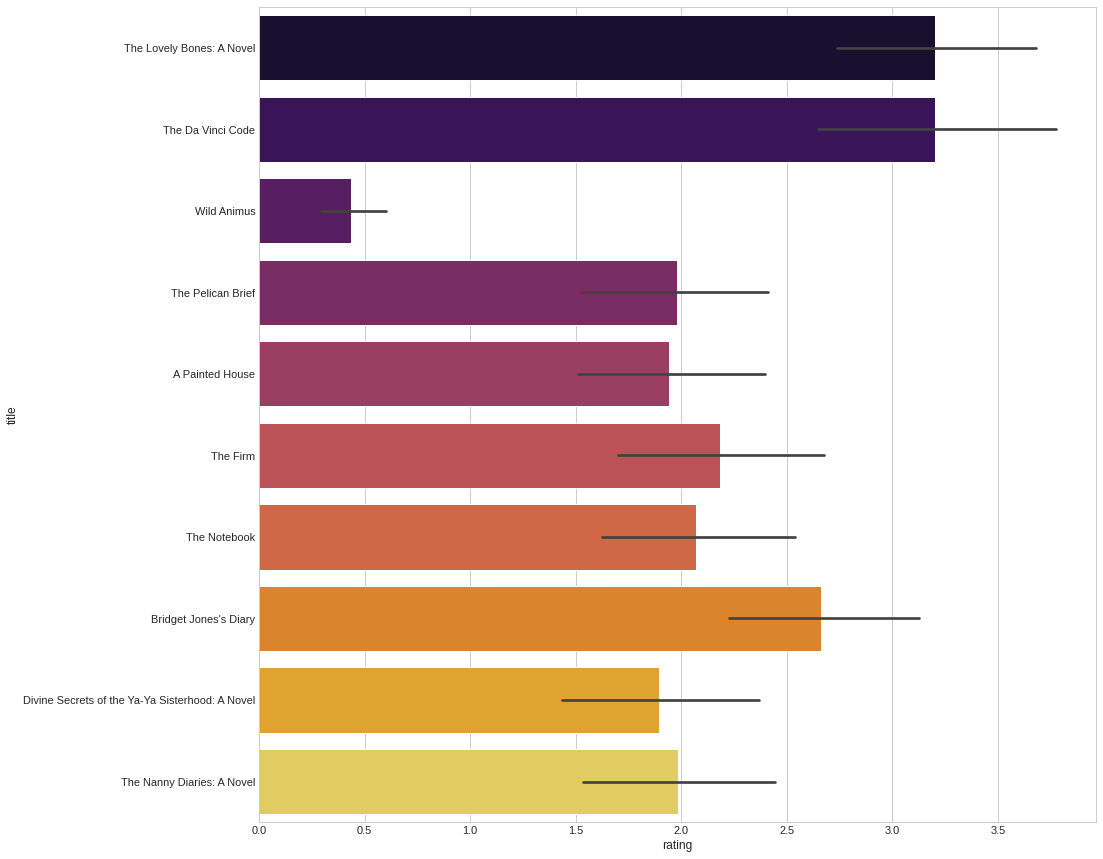

In [ ]:
top_ten=final_rating[final_rating['number_of_ratings']>220]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[15,15])
sns.barplot(x='rating', y='title', data=top_ten,palette='inferno')
plt.show()

[]

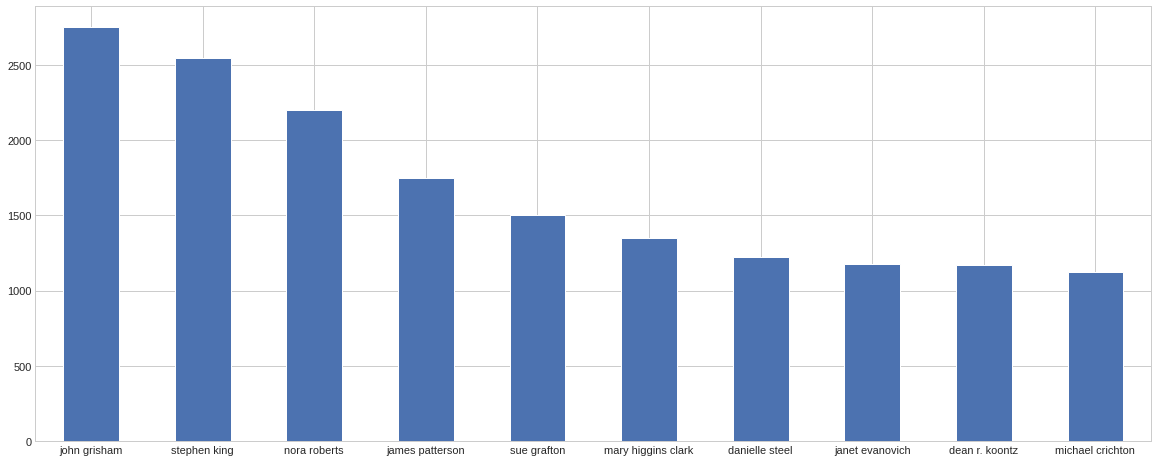

In [ ]:
#top 10 authors with highest mentions
top10_mention = final_rating['author'].value_counts()[:10]
plt.figure(figsize=[20,8])
ax = top10_mention.plot.bar(x='lab', y='val', rot=0)
plt.plot()

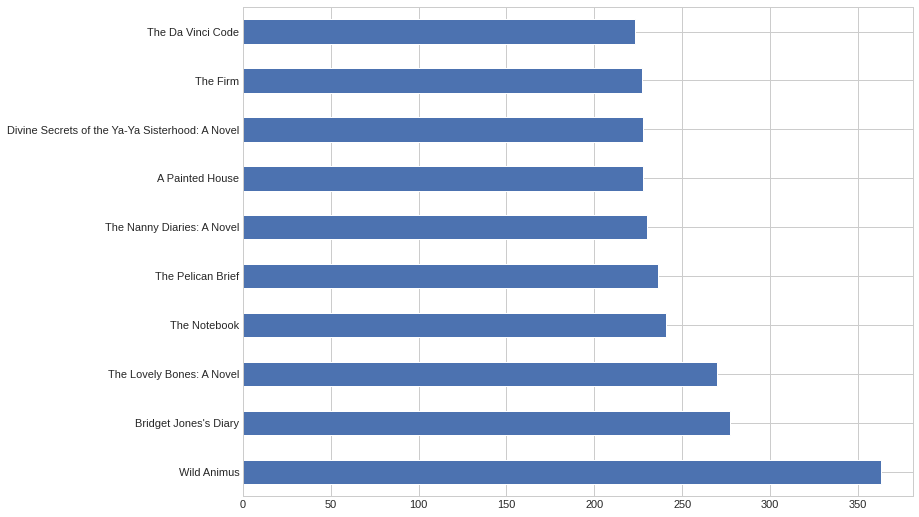

In [ ]:
#top 10 books that received ratings with highest mentions
plt.figure(figsize=[12,9])
ax = final_rating['title'].value_counts()[:10].plot.barh()

In [ ]:
top_rated=final_rating[final_rating['rating']==10]

[]

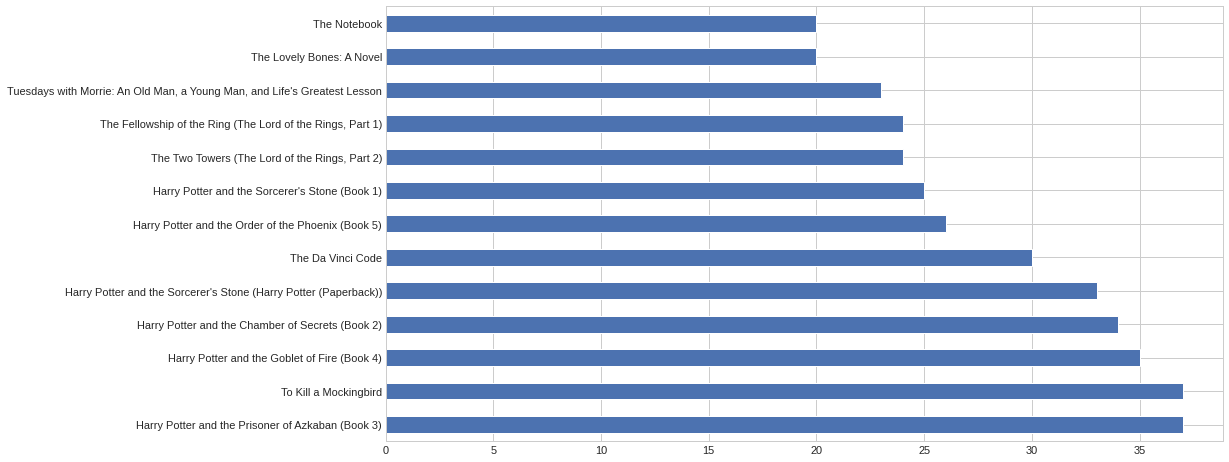

In [ ]:
#top books that received 10-rating at least 20 times
plt.figure(figsize=[15,8])
ax = top_rated['title'].value_counts()[:13].plot.barh(x='lab', y='val', rot=0)
plt.plot()

In [ ]:
final_rating.head(3)

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82


In [ ]:
print("The average rating of all the books is:", round(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False).mean(), 2))

The average rating of all the books is: 1.98


In [ ]:
#number of books above rating 3
meanRating_df = pd.DataFrame(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False))

In [ ]:
print("There are", len(meanRating_df[meanRating_df['rating']>3]), "books with rating above 3.")

There are 71 books with rating above 3.


In [ ]:
meanRating_df = round(meanRating_df['rating'].sort_index(),1)

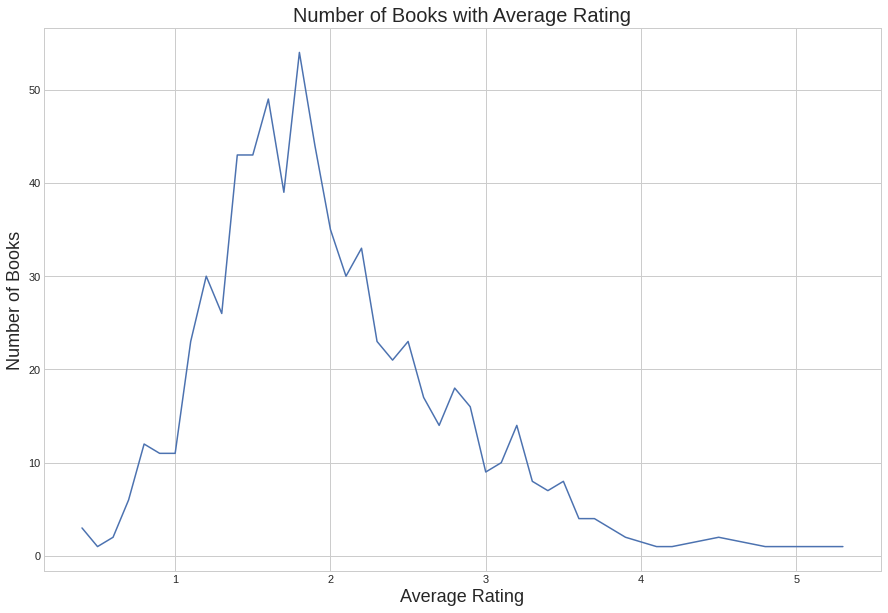

In [ ]:
plt.figure(figsize=[15,10])
plt.plot(meanRating_df.value_counts().sort_index())
plt.title ('Number of Books with Average Rating', fontsize = 20)
plt.xlabel('Average Rating', fontsize = 18)
plt.ylabel('Number of Books', fontsize = 18)
plt.show()

In [ ]:
len(top_rated['rating'].unique())
#top_rated=final_rating[final_rating['rating']==10]

1

In [ ]:
len(top_rated['title'].unique())

653

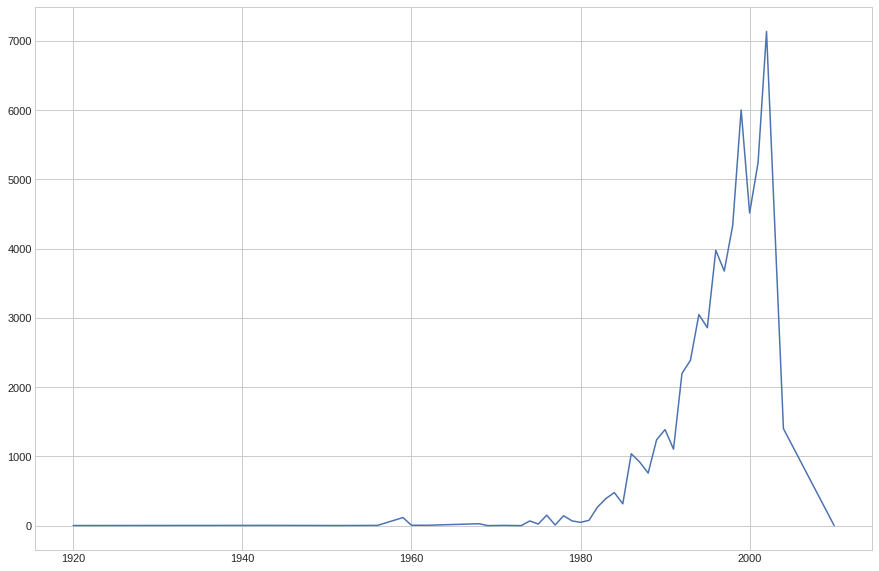

In [ ]:
#year wise number of books published
plt.figure(figsize=[15,10])
plt.plot(final_rating['year'].value_counts().sort_index())
#plt.title ('Number of Books with Average Rating', fontsize = 20)
#plt.xlabel('Average Rating', fontsize = 18)
#plt.ylabel('Number of Books', fontsize = 18)
plt.show()

In [ ]:
top_rated.groupby('title')['number_of_ratings'].count().reset_index()

,title,number_of_ratings
0,1984,11
1,1st to Die: A Novel,10
2,2nd Chance,7
3,84 Charing Cross Road,9
4,A Bend in the Road,3
...,...,...
648,Year of Wonders,5
649,You Belong To Me,2
650,Zen and the Art of Motorcycle Maintenance: An ...,2
651,Zoya,1


In [ ]:
top_rated['number_of_ratings'].value_counts(ascending=True)

114      1
133      2
122      2
200      2
163      3
      ... 
78      76
81      96
183    104
53     106
62     107
Name: number_of_ratings, Length: 128, dtype: int64

In [ ]:
top_rated[top_rated['number_of_ratings']>200]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
1100,16795,0142001740,10,The Secret Life of Bees,sue monk kidd,2003,Penguin Books,209
1108,29259,0142001740,10,The Secret Life of Bees,sue monk kidd,2003,Penguin Books,209
1114,36606,0142001740,10,The Secret Life of Bees,sue monk kidd,2003,Penguin Books,209
1124,55548,0142001740,10,The Secret Life of Bees,sue monk kidd,2003,Penguin Books,209
1163,124363,0142001740,10,The Secret Life of Bees,sue monk kidd,2003,Penguin Books,209
...,...,...,...,...,...,...,...,...
70145,273979,0312278586,10,The Nanny Diaries: A Novel,emma mclaughlin,2002,St. Martin's Press,230
70161,36606,0312291639,10,The Nanny Diaries: A Novel,emma mclaughlin,2003,St. Martin's Griffin,230
70179,107301,0312291639,10,The Nanny Diaries: A Novel,emma mclaughlin,2003,St. Martin's Griffin,230
70198,160819,0312291639,10,The Nanny Diaries: A Novel,emma mclaughlin,2003,St. Martin's Griffin,230


In [ ]:
final_rating.drop_duplicates(['user_id','title'], inplace=True)

In [ ]:
final_rating.shape

(57776, 8)

###Pivot Table

In [ ]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating')

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.fillna(0, inplace=True)

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [ ]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [ ]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
np.where(book_pivot.index==237)

(array([], dtype=int64),)

In [ ]:
distances, suggestions = model.kneighbors(book_pivot.iloc[356,:].values.reshape(1,-1), n_neighbors=6)

In [ ]:
distances

array([[ 0.        , 13.67479433, 17.32050808, 17.34935157, 17.66352173,
        19.        ]])

In [ ]:
suggestions

array([[356,  93, 305,   8, 173, 377]])

In [ ]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['No Safe Place', 'Call of the Wild', 'Long After Midnight',
       'A Civil Action', 'Exclusive', 'Pleading Guilty'],
      dtype='object', name='title')


In [ ]:
np.where(book_pivot.index=='Animal Farm')[0][0]

47

In [ ]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

  for i in range(len(suggestions)):
    # if i!=0:
      # print(book_pivot.index[suggestions[i]])
      print(i)

In [ ]:
book_recommendation('Animal Farm')

0


In [ ]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

  for i in range(len(suggestions)):
    if i==0:
      print("The suggestions for", book_name, "are: ")
    if not i:
      print(book_pivot.index[suggestions[i]])

In [ ]:
book_recommendation('Animal Farm')

The suggestions for Animal Farm are: 
Index(['Animal Farm', 'Exclusive', 'Call of the Wild', 'Jacob Have I Loved',
       'Pleading Guilty', 'No Safe Place'],
      dtype='object', name='title')


In [ ]:
book_recommendation('Harry Potter and the Chamber of Secrets (Book 2)')

The suggestions for Harry Potter and the Chamber of Secrets (Book 2) are: 
Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')
